In [1]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/bf/0315ef6a9fd3fc2346e85b0ff1f5f83ca17073f2c31ac719ab2e4da0d4a3/Keras_Preprocessing-1.0.9-py2.py3-none-any.whl


In [2]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [3]:
df = pd.read_csv('emotions.csv')

df['category'] = df['category'].str.strip()

train = df.loc[df.category == 'Training',:]
valid = df.loc[df.category == 'PublicTest',:]
test  = df.loc[df.category == 'PrivateTest',:]

X_train = np.array(train.iloc[:, 2:2306])
y_train = np.array(train.loc[:, ['y']])

X_val = np.array(valid.iloc[:, 2:2306])
y_val = np.array(valid.loc[:, ['y']])

X_test = np.array(test.iloc[:, 2:2306])
y_test = np.array(test.loc[:, ['y']])

mapping = {
    0: 'Angry', 
    1: 'Disgust', 
    2: 'Fear', 
    3: 'Happy', 
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'   
}

In [4]:
y_train = keras.utils.to_categorical(y_train, 7)
y_val = keras.utils.to_categorical(y_val, 7)
y_test = keras.utils.to_categorical(y_test, 7)

X_train_r = X_train.reshape((len(X_train), 48, 48))
X_val_r   = X_val.reshape((len(X_val), 48, 48))
X_test_r   = X_test.reshape((len(X_test), 48, 48))

X_train_r = X_train_r / 255
X_val_r = X_val_r / 255
X_test_r = X_test_r / 255

X_train_rgb = np.stack((X_train_r,) * 3, axis = -1)
X_val_rgb = np.stack((X_val_r, ) * 3, axis = -1)
X_test_rgb = np.stack((X_test_r, ) * 3, axis = -1)

X_train_bw = X_train_r.reshape((len(X_train_r), 48, 48, 1))
X_val_bw = X_val_r.reshape((len(X_val_r), 48, 48, 1))
X_test_bw = X_test_r.reshape((len(X_test_r), 48, 48, 1))

In [5]:
from keras import backend as K
from keras.applications.vgg19 import VGG19

from keras.metrics import categorical_accuracy

from keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers

np.random.seed(100)

### Alexnet model

In [19]:
model = Sequential()

model.add(Conv2D(96,(5,5), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(384,(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(384,(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(256,(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[categorical_accuracy])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 48, 48, 96)        2496      
_________________________________________________________________
batch_normalization_25 (Batc (None, 48, 48, 96)        384       
_________________________________________________________________
activation_25 (Activation)   (None, 48, 48, 96)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 96)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 256)       98560     
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 256)       1024      
__________

In [ ]:
#optimizer = Adam(lr=0.0001)
#model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[categorical_accuracy])

In [21]:
history = model.fit(X_train_bw, y_train, batch_size=256, epochs=50, validation_data=(X_val_bw, y_val))

Train on 28709 samples, validate on 3589 samples
Epoch 1/50
28709/28709 [==============================] - 48s 2ms/step - loss: 1.9503 - categorical_accuracy: 0.2363 - val_loss: 1.7647 - val_categorical_accuracy: 0.2889
Epoch 2/50
28709/28709 [==============================] - 38s 1ms/step - loss: 1.7277 - categorical_accuracy: 0.3227 - val_loss: 1.6955 - val_categorical_accuracy: 0.3661
Epoch 3/50
28709/28709 [==============================] - 38s 1ms/step - loss: 1.5718 - categorical_accuracy: 0.3944 - val_loss: 1.5295 - val_categorical_accuracy: 0.4085
Epoch 4/50
28709/28709 [==============================] - 38s 1ms/step - loss: 1.4469 - categorical_accuracy: 0.4468 - val_loss: 1.8759 - val_categorical_accuracy: 0.3594
Epoch 5/50
28709/28709 [==============================] - 38s 1ms/step - loss: 1.3434 - categorical_accuracy: 0.4847 - val_loss: 1.4032 - val_categorical_accuracy: 0.4522
Epoch 6/50
28709/28709 [==============================] - 38s 1ms/step - loss: 1.2650 - categori

28709/28709 [==============================] - 38s 1ms/step - loss: 0.3591 - categorical_accuracy: 0.8653 - val_loss: 1.4063 - val_categorical_accuracy: 0.6105
Epoch 49/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.3554 - categorical_accuracy: 0.8684 - val_loss: 1.4503 - val_categorical_accuracy: 0.6141
Epoch 50/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.3477 - categorical_accuracy: 0.8726 - val_loss: 1.6258 - val_categorical_accuracy: 0.6013


In [23]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


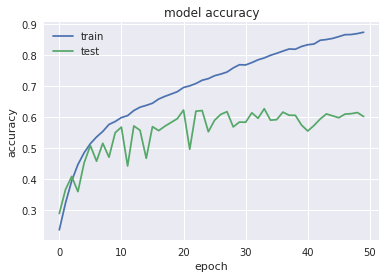

In [24]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


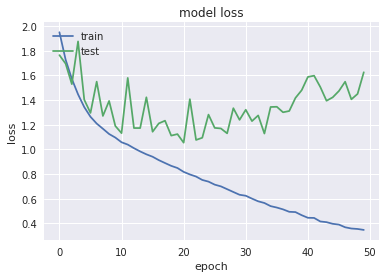

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
history2 = model.fit(X_train_bw, y_train, batch_size=256, epochs=50, validation_data=(X_val_bw, y_val))

Train on 28709 samples, validate on 3589 samples
Epoch 1/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.3266 - categorical_accuracy: 0.8813 - val_loss: 1.6832 - val_categorical_accuracy: 0.5921
Epoch 2/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.3269 - categorical_accuracy: 0.8818 - val_loss: 1.7400 - val_categorical_accuracy: 0.5943
Epoch 3/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.3183 - categorical_accuracy: 0.8847 - val_loss: 1.4437 - val_categorical_accuracy: 0.6392
Epoch 4/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.3097 - categorical_accuracy: 0.8884 - val_loss: 1.4781 - val_categorical_accuracy: 0.6353
Epoch 5/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.3047 - categorical_accuracy: 0.8897 - val_loss: 1.4817 - val_categorical_accuracy: 0.6442
Epoch 6/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.2925 - categori

28709/28709 [==============================] - 38s 1ms/step - loss: 0.1538 - categorical_accuracy: 0.9455 - val_loss: 1.9390 - val_categorical_accuracy: 0.6328
Epoch 49/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.1434 - categorical_accuracy: 0.9491 - val_loss: 1.8940 - val_categorical_accuracy: 0.6378
Epoch 50/50
28709/28709 [==============================] - 38s 1ms/step - loss: 0.1352 - categorical_accuracy: 0.9517 - val_loss: 1.9576 - val_categorical_accuracy: 0.6158


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


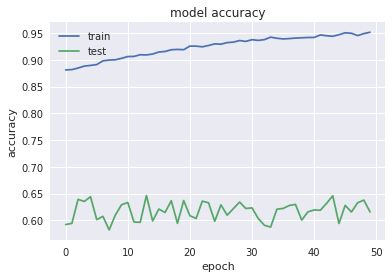

In [28]:
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model.evaluate(X_test_bw, y = y_test, verbose=1)

3589/3589 [==============================] - 4s 1ms/step


[1.816372376226987, 0.6355530788852631]

In [30]:
model.save_weights('alexnet.h5')